# **Beyond Linear Models**
**Lecture 04**
   


In [1]:
# Run this cell before continuing.
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(modelr)
library(tidyverse)
library(palmerpenguins)
library(titanic)
library(faraway)

penguins_clean <-
    penguins %>%
    drop_na()

titan  <-
    titanic_train  %>%
    as_tibble() %>%
    rename(passenger_class = Pclass,
           passenger_id = PassengerId,
           ticket_number = Ticket)

galapagos <- 
    gala %>% 
    as_tibble(rownames = 'island') %>%
    select(-Endemics)

colnames(galapagos) <- str_to_lower(colnames(galapagos))
colnames(titan) <- str_to_lower(colnames(titan))

options(repr.plot.width = 10, repr.plot.height = 5) 

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ──────────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::bootstrap()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


# From Feedback

- Lectures could use more structure; 
    - I agree! Especially based on last lecture. 
    - I'll put more structure into the lecture. 

<br>

- Answering questions might go a bit off topic and becomes disruptive;
    - I'll try to keep tabs on this; 
    - Also, increased lecture structure might help with this. 

<br>

- More breaks;
    - I could use a little more as well!
    - Let's try to have a 10 min break every 50 minutes of class;

# Last class: Review


When I label things as optional, I'm just bringing them to your attention. If you ever need them beyond this course, you'll know they exist. You don't need to know these for the course.

## Assumptions for the linear model


- **Linear associations:**
    - Diagnostic: 
        - Plot of predicted values against the residuals;
        - Check for patterns;
    - Consequence of violation:
        - Dubious model; 
    - Remedies:
        - Add transformations of covariates to the models (e.g., $X^2$, $\sqrt{X}$, $log(X)$)

- **Independence of erros:**
    - Diagnostic:
        - Frequently, we can tell from the student design whether this is an issue;
    - Consequence of violation:
        - Affects std. errors of coefficients;
        - Confidence interval and hypothesis tests are not valid.
    - Remedies: 
        - No simple remedies here; we need to adapt the model to deal with this;
        - These new techniques are whole new courses: e.g., times series analysis, spatial statistics, longitudinal analysis

- **Constant variance, $\sigma^2$ (homoscedasticity)**:
    - Diagnostic: 
        - Plot of predicted values against the residuals;
        - Check if there's a funnel shape;
    - Consequence of violation (heteroscedasticity):
        - Affects std. errors of coefficients;
        - Confidence interval and hypothesis tests are affected.
    - Remedies:
        - The simplest approach is to transform the response to stabilize the variance. Typical transformations: $\sqrt{Y}$ and $log(Y)$ (not that these only work for positive data). 
        - **(Optional)** But other transformations are possible [see a bunch here](https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf).
        - Bootstrapping for CIs and hypothesis tests;


- **Normality of the residuals**:
    - Diagnostic: 
        - Plot the histogram and QQ-plot of residuals;
        - **(Optional)** There are also hypothesis tests available to test for normality;
    - Consequence of violation:
        - Affect the sampling distribution of the coefficients in small samples;
        - CLT gives us some comfort for large samples;
    - Remedies:
        - If the sample is large, we don't need to do anything and could rely on CLT. 
        - Transform the response might also help here. 
        - Bootstrapping for CIs and hypothesis tests;


<hr>

# **Today's topic: Logistic and Poisson Regression**


Now that we have covered Multiple Linear Regression, which aims to model the relationship between a dependent variable and multiple independent variables with a quantitative outcome, let's move on to logistic and Poisson regression. These methods are suited for different types of response variables. Logistic regression is used when the dependent variable is categorical, usually binary. It models the probability of an event occurring by fitting data to a logistic curve, transforming linear outputs into probabilities through the logistic function.

On the other hand, Poisson regression is suitable for count data, where the dependent variable represents the number of occurrences of an event within a fixed interval. It assumes that the counts follow a Poisson distribution and models the logarithm of the expected counts as a linear combination of the independent variables. Both logistic and Poisson regression use the familiar framework of linear predictors while expanding the applicability of regression analysis to a wider range of data types and research questions.

## 1. Logistic Regression

- Logistic regression is a powerful statistical method used for modelling binary outcome variables. 

- Unlike linear regression, which predicts continuous values, logistic regression **predicts the probability** of a binary event occurring (e.g., success/failure, yes/no, or true/false). 

- Logistic regression not only provides interpretable coefficients but also allows for effective classification and decision-making across various fields, including medicine, finance, and social sciences. 

- By understanding logistic regression, we can effectively handle dichotomous data and uncover insights that would be obscured by traditional linear approaches.

In this sections, we will work with data about the `titanic`. Let's take a look:

In [2]:
# Let's take a look at the titanic data set

cat("\nThe titanic dataset has information about", nrow(titan ), "passengers.")

titan  %>%
    slice_sample(n = 5)


The titanic dataset has information about 891 passengers.

passenger_id,survived,passenger_class,name,sex,age,sibsp,parch,ticket_number,fare,cabin,embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
659,0,2,"Eitemiller, Mr. George Floyd",male,23,0,0,29751,13.0000,,S
574,1,3,"Kelly, Miss. Mary",female,NA,0,0,14312,7.7500,,Q
193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19,1,0,350046,7.8542,,S
623,1,3,"Nakid, Mr. Sahid",male,20,1,1,2653,15.7417,,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,1,1,36928,164.8667,,S


- You can find details about the columns by typing `?titan `.

- Given all the information we have about the passengers, I want to calculate the probability of survival (see `Survived` column).

- Let's start by using the model we know, MLR, and see why it is less than adequate for this job. 

### 1.1 Classifying with LR: a range problem

Let's start with the following model: 
$$
    \text{Survived} = \beta_0 + \beta_1\times\text{fare} + \varepsilon_i
$$


In [3]:
##[1] Fitting the model

model_titanic_lr <- lm(survived ~ fare, data = titan )
summary(model_titanic_lr)


Call:
lm(formula = survived ~ fare, data = titan)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9653 -0.3391 -0.3222  0.6044  0.6973 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3026994  0.0187849  16.114  < 2e-16 ***
fare        0.0025195  0.0003174   7.939 6.12e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4705 on 889 degrees of freedom
Multiple R-squared:  0.06621,	Adjusted R-squared:  0.06516 
F-statistic: 63.03 on 1 and 889 DF,  p-value: 6.12e-15


`geom_smooth()` using formula = 'y ~ x'


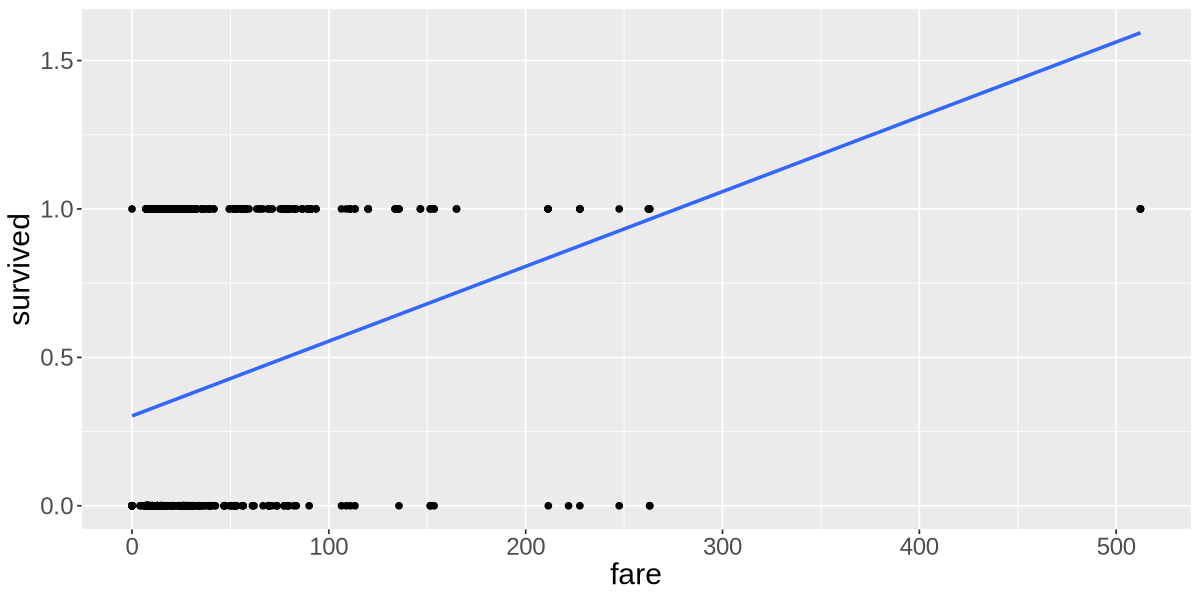

In [4]:
##[2] Plotting 
titan  %>%
    ggplot(aes(fare, survived)) + 
    geom_point() + 
    geom_smooth(method = lm, se = FALSE) + 
    theme(text = element_text(size = 18))

- Remember that the linear regression is model the conditional mean $E[\text{survived}\ |\ \text{fare}]$, we can show that this is the probability of `survived` given `fare`, $P(\left.\text{survived} = 1 \right| \text{fare})$.  

- However, probabilities are between 0 and 1 (always!), and the model gives us outputs above 1. 

### 1.2 The Logistic Regression Model

- As we saw in the previous section, trying to predict probability using a linear combination of covariates will cause range problems (probabilities outside the interval [0,1]).

- So, the idea here is to use a non-linear model:
$$
P(\left.Y_{i} = 1 \right| X_{i1}) = \frac{e^{\beta_0 + \beta_1 X_{i1}}}{1 + e^{\beta_0 + \beta_1 X_{i1}}}\quad\quad\quad\quad\quad\quad\quad\quad [\text{Eq. 1}]
$$

- Under the model above (Eq. 1), the probability is always between 0 and 1. Let's take a look $P(\left.Y_{i} = 1 \right| X_{i1})$ as a function of $X$: 

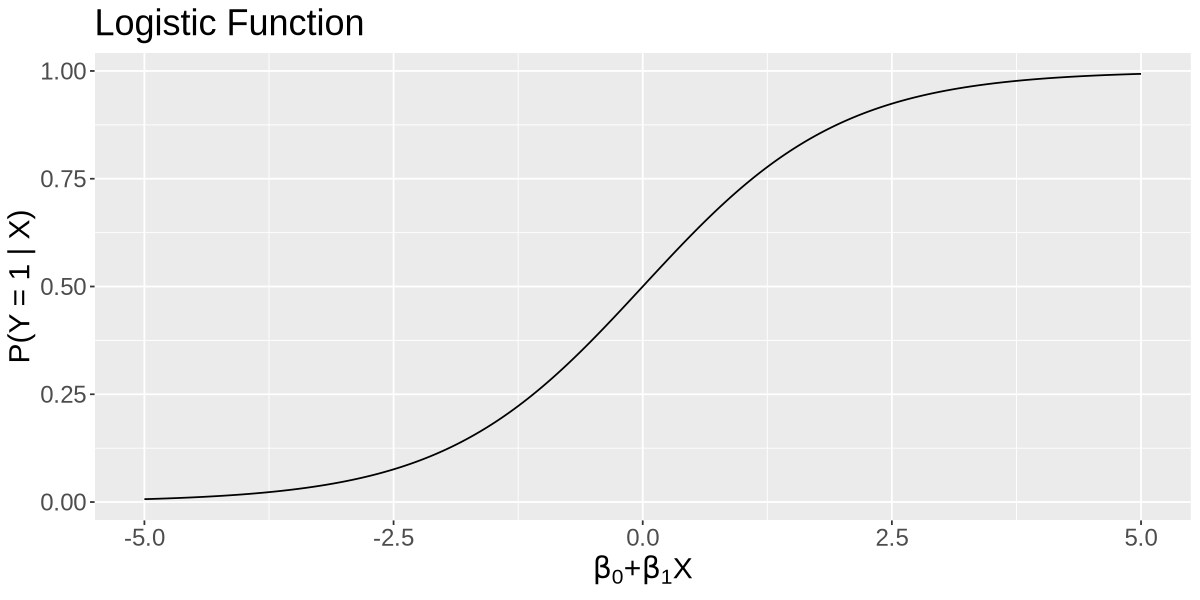

In [5]:
# Plotting Eq 1 
# Here the value of z is  z = beta_0 + beta_1 * X
tibble(z = seq(-5, 5, 0.01),
       logistic_function = exp(z)/(1+exp(z))) %>%
    ggplot(aes(z, logistic_function)) + 
    geom_line() + 
    theme(text = element_text(size = 18)) + 
    xlab(expression(paste(beta[0], '+', beta[1], 'X'))) + 
    ylab('P(Y = 1 | X)') + 
    ggtitle('Logistic Function')

- As you can see above, the value is contained between 0 and 1.

**Odds:**

- But note that Eq. 1 is the same as 

$$
\frac{P(\left.Y_{i} = 1 \right| X_{i1})}{1-P(\left.Y_{i} = 1 \right| X_{i1})} = e^{\beta_0 + \beta_1 X_{i1}}\quad\quad\quad\quad\quad\quad\quad\quad [\text{Eq. 2}]
$$

- The quantity $P(\left.Y_{i} = 1 \right| X_{i1})/\left[1-P(\left.Y_{i} = 1 \right| X_{i1})\right]$ is called <font color='darkred'>**odds**</font>.

<br>

- For the titanic case:
$$
\frac{P(\left.\text{survived} = 1 \right| \text{fare})}{1-P(\left.\text{survived} = 1 \right| \text{fare})}
$$
    - odds close to 0 -> low chance of survival;
    - as the probability of survival increases, the odds increases (indefinitely).
    
    
**Numerical Examples:**

- A passenger with an odd of $0.25 = 1/4$ means that the passenger has 1 in 5 chance of surviving.
- A passenger with an odd of $0.5 = 1/2$ means that the passenger has 1 in 3 chance of surviving.
- A passenger with an odd of $0.75 = 3/4$ means that the passenger has 3 in 7 chance of surviving.
- A passenger with an odd of $1$ means that the passenger has 1 in 2 chance of surviving.
- A passenger with an odd of $2$ means that the passenger has 2 in 3 chance of surviving.
- A passenger with an odd of $3$ means that the passenger has 3 in 4 chance of surviving.

- If we take the log of Eq. 2 we have: 
$$
\log\left(\frac{P(\left.Y_{i} = 1 \right| X_{i1})}{1-P(\left.Y_{i} = 1 \right| X_{i1})}\right) = \beta_0 + \beta_1 X_{i1}\quad\quad\quad\quad\quad\quad\quad\quad [\text{Eq. 3}]
$$
which is called <font color='darkred'>log-odds</font> or <font color='darkred'>logit</font>;

<br>

- The logit is linear in $X$! 
    - We can use the linear model we are used to to model the **logit** of function;

### 1.3 Fitting a logistic regression in R

- To fit a logistic regression we use the Maximum Likelihood Method; 
    - You don't need about the details of the method; 

$$
\log\left(\frac{P(\left.\text{survived} = 1 \right| \text{fare})}{1-P(\left.\text{survived} = 1 \right| \text{fare})}\right) = \beta_0 + \beta_1\times\text{fare}
$$

In [6]:
#[3] Fitting Logistic Regression

model_titanic_logistic <- glm(formula = survived ~ fare, data = titan, family = 'binomial')
summary(model_titanic_logistic)


Call:
glm(formula = survived ~ fare, family = "binomial", data = titan)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4906  -0.8878  -0.8531   1.3429   1.5942  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.941330   0.095129  -9.895  < 2e-16 ***
fare         0.015197   0.002232   6.810 9.79e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.7  on 890  degrees of freedom
Residual deviance: 1117.6  on 889  degrees of freedom
AIC: 1121.6

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


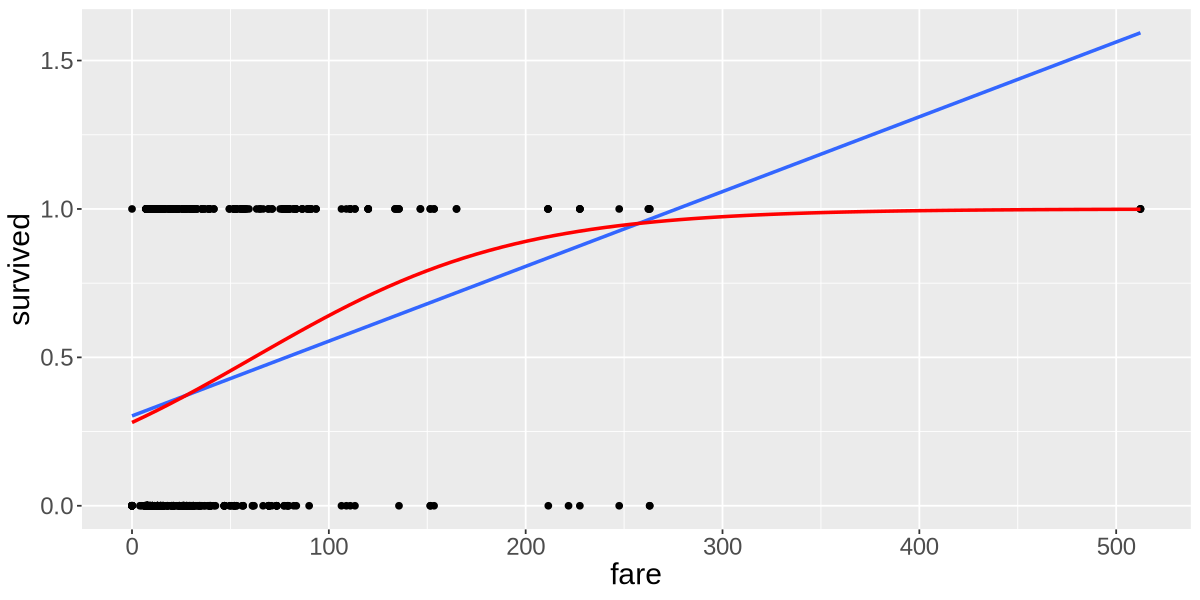

In [7]:
#[4] Plotting 
titan  %>%
    ggplot(aes(fare, survived)) + 
    geom_point() + 
    geom_smooth(method = lm, se = FALSE) + 
    geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color = 'red') + 
    theme(text = element_text(size = 18))

### 1.4 **Logistic Regression and Interpretation**

In LR, we were modelling 

$$
E[Y|X] = \beta_0 + \beta_1 X
$$

but in logistic regression, we are modelling the **logit**

$$
\log\left(\frac{P(\left.Y = 1 \right| X)}{1-P(\left.Y = 1 \right| X)}\right) = \beta_0 + \beta_1 X
$$

therefore, we need to adjust our interpretation.

#### 1.4.1 **One numeric covariate**

Let's see the output of our logistic model for the Titanic data again:

$$
\log\left(\frac{P(\left.\text{survived} = 1 \right| \text{fare})}{1-P(\left.\text{survived} = 1 \right| \text{fare})}\right) = \beta_0 + \beta_1\times\text{fare}
$$

In [8]:
model_titanic_logistic


Call:  glm(formula = survived ~ fare, family = "binomial", data = titan)

Coefficients:
(Intercept)         fare  
    -0.9413       0.0152  

Degrees of Freedom: 890 Total (i.e. Null);  889 Residual
Null Deviance:	    1187 
Residual Deviance: 1118 	AIC: 1122


**Interpretation:**

- Intercept - $\beta_0 = -0.9413$: if the `fare` paid was 0 dollars, the logit is expected to be -0.9413.
- Slope - $\beta_1 = 0.0152$: an increase of 1 dollar in the `fare` paid is associated with an increase in the logit of 0.0152.

But interpreting the `logit` function itself is hard. So, we usually interpret the exponential of the coefficients, so we can talk in terms of **odds** instead of logits. 

In [9]:
#[5] Coefficients for the odds
tidy(model_titanic_logistic, exponentiate = TRUE)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.3901087,0.095129144,-9.895284,4.363702e-23
fare,1.0153129,0.002231678,6.809614,9.786127e-12


- Intercept: $e^{\beta_0} = e^{-0.9413} = 0.3901$, if the `fare` paid was 0 dollars, the **odds** is expected to be 0.3901.
- Slope: $e^{\beta_1} = e^{0.0152} = 1.0153$, it <font color='darkred'>**multiplies**</font> the **odds** by 1.0153, i.e., it increases the odds in $1.53\%$ of its value.

#### 1.4.2 **One categorical covariate**

Let's fit a logistic regression now using `sex` as covariate. 

$$
\log\left(\frac{P(\left.\text{survived} = 1 \right| \text{fare})}{1-P(\left.\text{survived} = 1 \right| \text{fare})}\right) = \beta_0 + \beta_1 X_\text{male}
$$

where $X_\text{male} = 1$ if passenger is male and 0 if female. 

In [10]:
#[6] Fit Logistic Regression with Sex as covariate
model_titanic_logistic_sex <- glm(survived ~ sex, family = binomial, data = titan ) 
model_titanic_logistic_sex


Call:  glm(formula = survived ~ sex, family = binomial, data = titan)

Coefficients:
(Intercept)      sexmale  
      1.057       -2.514  

Degrees of Freedom: 890 Total (i.e. Null);  889 Residual
Null Deviance:	    1187 
Residual Deviance: 917.8 	AIC: 921.8

In [11]:
#[7] Get the coefficients for the odds
tidy(model_titanic_logistic_sex, exponentiate = TRUE)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.87654321,0.1289864,8.191477,2.580394e-16
sexmale,0.08096732,0.1671782,-15.036107,4.258662e-51


**Interpretation:**

- Reference level: `female`
- Intercept: $e^{\beta_0} = e^{1.057} = 2.8765$, a female passenger had a 2.8765 odds of surviving (i.e., the proportion of survivals relative to the proportion of deaths in the sample)
- Slope: $e^{\beta_1} = e^{-2.514} = 0.08097$, it <font color='darkred'>**multiplies**</font> the female passenger **odds** by 0.08097; or, alternatively, is male passangers's **odds** of **dying** were $e^{2.514} = 12.3542$ higher than of that of females. 
    - Not a good time to be a male in a ship, eh?

In [12]:
#[8] Let's check these numbers with the sample
titan  %>%
    group_by(sex) %>%
    count(survived)

sex,survived,n
<chr>,<int>,<int>
female,0,81
female,1,233
male,0,468
male,1,109


In [13]:
#[9] Odds of surviving - female
233/81 # This is our beta 0

[1] 2.876543

In [14]:
#[10] Odds of surviving - male
109/468

[1] 0.232906

In [15]:
#[11] Odds of surving - male: using beta_1 times odds_surving_female
233/81 * 0.08097

[1] 0.2329137

In [16]:
#[12] Odds of dying - female
81/233 # This is our beta 0

[1] 0.3476395

In [17]:
#[13] Odds of dying - male
468/109 # This is our beta 0

[1] 4.293578

In [18]:
#[14] Odds of dying - male: using exp(-beta_1) times odds_dying_female
81/233 * exp(-model_titanic_logistic_sex$coefficients[2])

sexmale 
4.293578

#### 1.4.2 **One categorical one numerical covariate**

Let's fit a logistic regression using `Sex` and `Fare`:

$$
\log\left(\frac{P(\left.\text{survived} = 1 \right| \text{fare})}{1-P(\left.\text{survived} = 1 \right| \text{fare})}\right) = \beta_0 + \beta_1 X_\text{male} + \beta_2\times\text{fare}
$$

where $X_\text{male} = 1$ if passenger is male and 0 if female. 

In [19]:
#[15] Fit Logistic Regression with Sex and Fare as covariates

model_titanic_logistic_multiple <- glm(survived ~ sex + fare, family = binomial, data = titan ) 
model_titanic_logistic_multiple


Call:  glm(formula = survived ~ sex + fare, family = binomial, data = titan)

Coefficients:
(Intercept)      sexmale         fare  
    0.64710     -2.42276      0.01121  

Degrees of Freedom: 890 Total (i.e. Null);  888 Residual
Null Deviance:	    1187 
Residual Deviance: 884.3 	AIC: 890.3

Here, we have two logistic curves with different intercepts for the `logit` function, but the same slope. 

\begin{equation*}
  \text{logit}(p_\text{survival}) = \beta_0 + \beta_1\times X_\text{male} + \beta_2 \times \text{fare} = \begin{cases}
        \beta_0 + \beta_2 \times \text{fare}, \quad\quad\quad \text{if } X_\text{male} = 0\\
        \beta_0 + \beta_1 + \beta_2 \times \text{fare}, \quad \text{ if } X_\text{male} = 1
        \end{cases}
\end{equation*}
 
Therefore, for the odds: 

\begin{equation*}
  \frac{p_\text{survival}}{1-p_\text{survival}} = \begin{cases}
        e^{\beta_0}e^{\beta_2\text{fare}}, \quad\quad\quad \text{if } X_\text{male} = 0\\
        e^{\beta_0 + \beta_1}e^{\beta_2 \text{fare}}, \quad\quad \text{if } X_\text{male} = 1
        \end{cases}
\end{equation*}


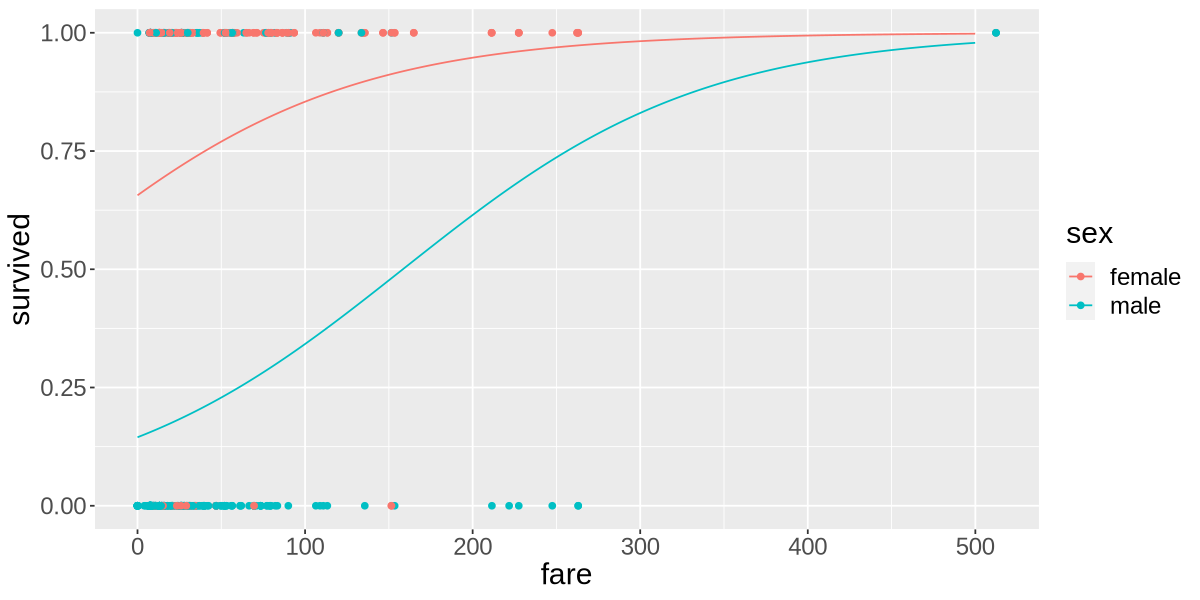

In [20]:
#[16] Plotting the logistic curves

# Don't worry about this part of the code
data_for_plotting <-  
    tibble(fare = rep(seq(0, 499.99, 0.1), 2), 
           sex = c(rep('female', 5000), rep('male', 5000))) %>%
    add_predictions(model = model_titanic_logistic_multiple, var = 'pred', type = 'response')
##############################################

titan  %>%
    ggplot(aes(fare, survived, color = sex)) + 
    geom_point() + 
    geom_line(aes(y = pred), data = data_for_plotting) + 
    theme(text = element_text(size = 18))

In [21]:
#[17] Getting the coefficients for the odds
tidy(model_titanic_logistic_multiple, exponentiate = TRUE)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.90999419,0.148502397,4.357507,1.315524e-05
sexmale,0.08867652,0.170515090,-14.208480,8.116863e-46
fare,1.01127719,0.002295331,4.885605,1.031115e-06


- Note that we are controlling for `fare`. For any constant `fare` value, being male changes the `odds` of surviving by a factor of $e^{-2.42276} = 0.0887$, or in other words, it increases the odds of dying by $11.2769$ times. 

- Another way to look at this is that male passengers have only $8.87\%$ of the odds of surviving a female passenger. 

In [22]:
#[18] For example, for a fare of 500, the odds for females and males are: 
exp(predict(model_titanic_logistic_multiple, 
            newdata = tibble(fare = c(500, 500), sex = c('female', 'male'))))

1         2 
520.16173  46.12613

- Considering `sex` constant, increasing the fare in 1 dollar increases the odds of surviving in approx. $1.1\%$ for either `male` or `female`.
    - Considering `sex` constant, increasing the fare in 1 dollar changes the odds of surviving by a factor of $1.0113$.

In [23]:
#[19] For example, females and males passenger, increasing the fare from 500 to 501:
aux <- exp(predict(model_titanic_logistic_multiple, newdata = tibble(fare = c(500, 501, 500, 501), sex=c('female', 'female', 'male','male'))))

cat("\nFor female passengers, increasing the fare from 500 to 501 increases the odds of surviving from", aux[1], 'to', aux[2], '.\n')
cat("\nFor male passengers, increasing the fare from 500 to 501 increases the odds of surviving from", aux[3], 'to', aux[4], '.\n')


For female passengers, increasing the fare from 500 to 501 increases the odds of surviving from 520.1617 to 526.0277 .

For male passengers, increasing the fare from 500 to 501 increases the odds of surviving from 46.12613 to 46.6463 .


#### 1.4.3 **One categorical and one numerical covariate with interaction term**

Let's fit a logistic regression using `Sex` and `Fare`:

$$
\log\left(\frac{P(\left.\text{survived} = 1 \right| \text{fare})}{1-P(\left.\text{survived} = 1 \right| \text{fare})}\right) = \beta_0 + \beta_1 X_\text{male} + \beta_2\times\text{fare} + \beta_3 X_\text{male}\times\text{fare}
$$

where $X_\text{male} = 1$ if passenger is male and 0 if female. 

In [24]:
#[20] Fit the model with interaction
model_titanic_logistic_interaction <- glm(survived ~ sex * fare, family = binomial, data = titan ) 
summary(model_titanic_logistic_interaction)


Call:
glm(formula = survived ~ sex * fare, family = binomial, data = titan)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6280  -0.6279  -0.5991   0.8172   1.9288  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.408428   0.189999   2.150 0.031584 *  
sexmale      -2.099345   0.230291  -9.116  < 2e-16 ***
fare          0.019878   0.005372   3.701 0.000215 ***
sexmale:fare -0.011617   0.005934  -1.958 0.050252 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  879.85  on 887  degrees of freedom
AIC: 887.85

Number of Fisher Scoring iterations: 5


Here, we have two logistic curves with different intercepts and slopes for the  `logit`. 

\begin{equation*}
  \text{logit}(p_\text{survival}) = \beta_0 + \beta_1\times X_\text{male} + \beta_2 \times \text{fare} + \beta_3 \times \text{fare}\times X_\text{male}= \begin{cases}
        \beta_0 + \beta_2 \times \text{fare}, \quad\quad\quad \text{if } X_\text{male} = 0\\
        \beta_0 + \beta_1 + \left(\beta_2 +\beta_3\right)\times \text{fare}, \quad \text{ if } X_\text{male} = 1
        \end{cases}
\end{equation*}
 
Therefore, for the odds: 

\begin{equation*}
  \frac{p_\text{survival}}{1-p_\text{survival}} = \begin{cases}
        e^{\beta_0}e^{\beta_2\text{fare}}, \quad\quad\quad \ \ \text{if } X_\text{male} = 0\\
        e^{\beta_0 + \beta_1} e^{\left(\beta_2+\beta_3\right) \text{fare}}, \quad \text{if } X_\text{male} = 1
        \end{cases}
\end{equation*}


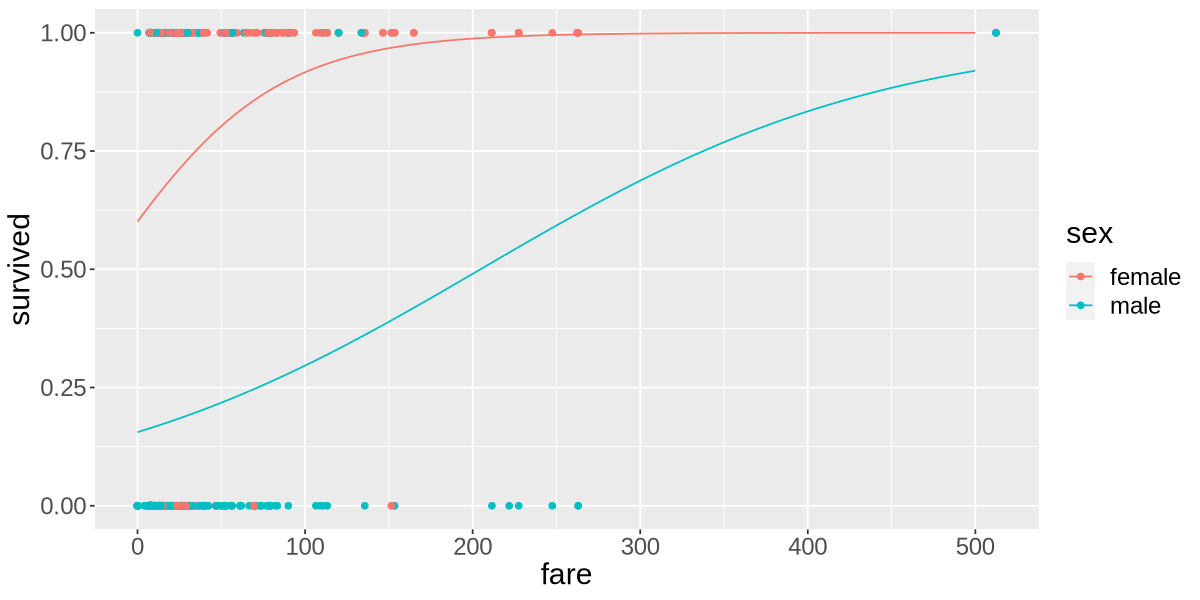

In [25]:
#[21c] Plotting 

# Don't worry about this part of the code
data_for_plotting <-  
    tibble(fare = rep(seq(0, 499.99, 0.1), 2), 
           sex = c(rep('female', 5000), rep('male', 5000))) %>%
    add_predictions(model = model_titanic_logistic_interaction, var = 'pred', type = 'response')
##############################################

titan  %>%
    ggplot(aes(fare, survived, color = sex)) + 
    geom_point() + 
    geom_line(aes(y = pred), data = data_for_plotting) + 
    theme(text = element_text(size = 18))

Note that the coefficient estimates here are the same as if a model with `fare` as covariate only for women passenger and a model only for male passengers:

In [26]:
summary(glm(survived ~ fare, family = binomial, data = titan  %>% filter(sex == 'female')))


Call:
glm(formula = survived ~ fare, family = binomial, data = titan %>% 
    filter(sex == "female"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6280  -1.4224   0.6451   0.8901   0.9537  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.408428   0.190018   2.149 0.031602 *  
fare        0.019878   0.005374   3.699 0.000216 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 358.53  on 313  degrees of freedom
Residual deviance: 334.05  on 312  degrees of freedom
AIC: 338.05

Number of Fisher Scoring iterations: 6


In [27]:
# the slope for males in the model with interaction is given by: 0.019878-0.011617 = 0.008261
summary(glm(survived ~ fare, family = binomial, data = titan  %>% filter(sex == 'male')))


Call:
glm(formula = survived ~ fare, family = binomial, data = titan %>% 
    filter(sex == "male"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3877  -0.6273  -0.5997  -0.5976   1.9288  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.690918   0.130132 -12.994  < 2e-16 ***
fare         0.008261   0.002521   3.277  0.00105 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 559.27  on 576  degrees of freedom
Residual deviance: 545.80  on 575  degrees of freedom
AIC: 549.8

Number of Fisher Scoring iterations: 4


In [28]:
#[22c]
tidy(model_titanic_logistic_interaction, exponentiate = TRUE)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.5044506,0.189998621,2.149635,3.158407e-02
sexmale,0.1225366,0.230290839,-9.116061,7.790454e-20
fare,1.0200774,0.005371548,3.700698,2.150071e-04
sexmale:fare,0.9884501,0.005933729,-1.957809,5.025241e-02


The reasoning for interpretation is the same. 
Just remember that now, we have an interaction term, so different slopes for `fare`.

### 1.5 Inference 

The results in this section are theorectical results based on large samples. 

For confidence intervals of $1-\alpha$%, we can use

$$
CI\left(\hat{\beta}_j, 1-\alpha\right) = \hat{\beta}_j \pm z_{\alpha/2}\hat{\text{SE}}(\hat{\beta}_j)
$$

To test $H_0: \hat{\beta}_j = 0$ vs $H_1: \hat{\beta}_j \neq 0$, we have that, under the null hypothesis:

$$
\frac{\hat{\beta}_j}{\hat{\text{SE}}(\hat{\beta}_j)} \sim N(0, 1)
$$

But again, R will do all this for you.

In [29]:
#[23c]
tidy(model_titanic_logistic_interaction, conf.int = TRUE, conf.level = 0.9)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.40842776,0.189998621,2.149635,3.158407e-02,0.09366300,0.719563508
sexmale,-2.09934529,0.230290839,-9.116061,7.790454e-20,-2.47894577,-1.720679671
fare,0.01987848,0.005371548,3.700698,2.150071e-04,0.01183919,0.029554655
sexmale:fare,-0.01161711,0.005933729,-1.957809,5.025241e-02,-0.02204941,-0.002425457


In [30]:
#[24c]
tidy(model_titanic_logistic_interaction, conf.int = TRUE, conf.level = 0.9, exponentiate = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.5044506,0.189998621,2.149635,3.158407e-02,1.09818959,2.0535367
sexmale,0.1225366,0.230290839,-9.116061,7.790454e-20,0.08383156,0.1789445
fare,1.0200774,0.005371548,3.700698,2.150071e-04,1.01190955,1.0299957
sexmale:fare,0.9884501,0.005933729,-1.957809,5.025241e-02,0.97819191,0.9975775


In [31]:
#[25c] Note that the exponentiate will exponentiate the boundaries 
# of the interval as well
# Look for the interval of the intercept
exp(c(0.09366300, 0.719563508))

[1] 1.098190 2.053537

# 2. Poisson Regression

- Poisson regression is a regression analysis designed for modelling **count data**, where the response variable represents the number of times an event occurs within a fixed interval of time or space. 

- Since **counts are nonnegative integers**, if we use linear regression, we might have a range problem by predicting negative counts. 

- By employing Poisson regression, we can analyze and predict event counts, such as the number of customer arrivals, disease occurrences, or traffic accidents, providing valuable insights into the factors influencing these events and enabling better decision-making.


In Poisson regression, the response variable $Y$ is a count, and the conditional distribution of $Y$ is 

$$
Y_i | X_i \sim Poisson(\lambda_i)
$$

If you never heard of the Poisson distribution it is ok. Here's what you need to know: 

- Only takes values $0, 1, 2, 3,...$
- The mean value is $\lambda$, i.e., $E\left[Y_i | X_i \right] = \lambda_i$
- Interestingly, the variance is also $\lambda$!

Again, instead of modelling the mean directly, it models the logarithm of the expected count as a linear combination of predictor variables:
 
$$
\log(\lambda_i) = \beta_0 + \beta_1X_i
$$

This log-linear relationship allows Poisson regression to effectively handle the nonnegative integer nature of count data.


Consider the following dataset from the `faraway` package that contains information about different island and the number of plant species found in each island. 

In [32]:
#[26c]
galapagos %>% 
    slice_sample(n = 5)

island,species,area,elevation,nearest,scruz,adjacent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SanSalvador,237,572.33,906,0.2,19.8,4.89
Daphne.Major,18,0.34,119,8.0,8.0,1.84
SanCristobal,280,551.62,716,45.2,66.6,0.57
Enderby,2,0.18,112,2.6,50.2,0.10
Fernandina,93,634.49,1494,4.3,95.3,4669.32


Let's fit the following model:

$$
\log(\lambda_i) = \beta_0 + \beta_1\times\text{elevation}_i
$$

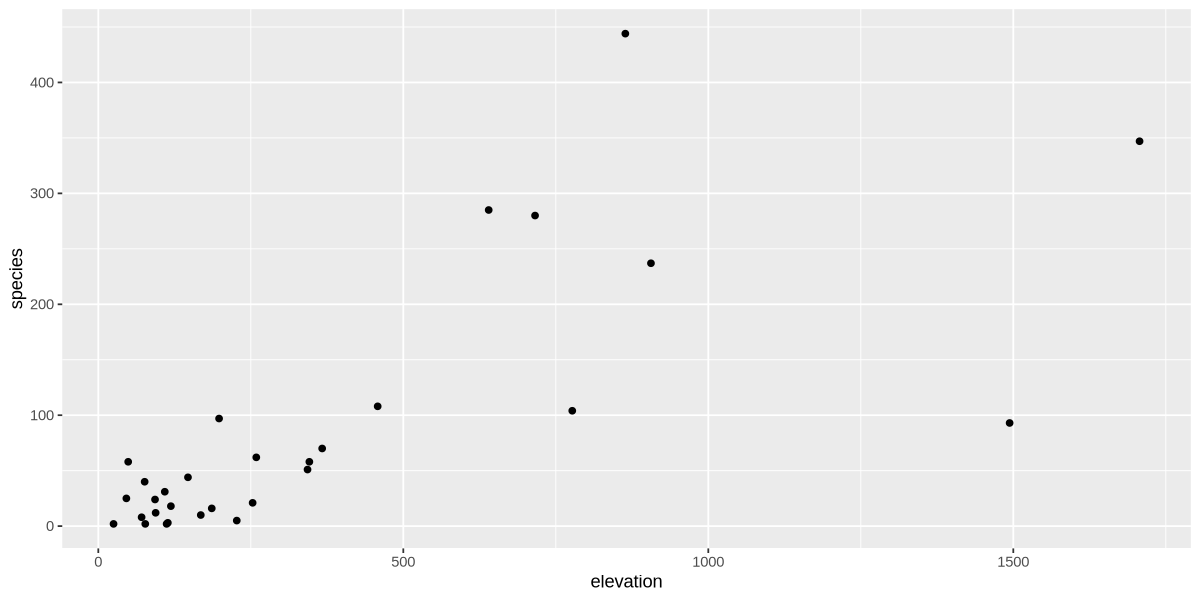

In [33]:
#[27c]
galapagos %>%
    ggplot(aes(elevation, species)) +
    geom_point()

**Question:** What do you observe from the plot above? 

To fit a Poisson model: 

In [34]:
#[28] Fit a poisson regression with elevation as covariate.
model_galapagos <- glm(species ~ elevation, family = poisson, data = galapagos)
model_galapagos


Call:  glm(formula = species ~ elevation, family = poisson, data = galapagos)

Coefficients:
(Intercept)    elevation  
   3.664649     0.001436  

Degrees of Freedom: 29 Total (i.e. Null);  28 Residual
Null Deviance:	    3511 
Residual Deviance: 1826 	AIC: 1991

**Interpretation:**

An increase of 1 meter in the maximum elevation of an island is associated with a change in the average number of plant species found by a factor of $e^{0.0014} = 1.00144$, i.e., an increase of $0.14\%$.

You'll do more on Poisson Regression in the worksheet! 

Cheers! 